In [2]:
import tensorflow as tf
tf.__version__ 

'2.16.1'

In [3]:
# Import The Libraries 

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential

import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [4]:
# Paths
train_Path = '/kaggle/input/gujarati-language-hand-signs/data/train'
test_Path = '/kaggle/input/gujarati-language-hand-signs/data/test'

In [5]:
# Set Resize variable
IMAGE_SIZE = [224, 224] # This is my desired image size... and also ResNet50 accepts image of 224*224.

In [6]:
resnet = ResNet50(
    input_shape = IMAGE_SIZE + [3], # Making the image into 3 Channel, so concating 3.
    weights = 'imagenet', # Default weights.
    include_top = False   # 
)

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [7]:
resnet.summary()

Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 23,534,592 (89.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [8]:
for layer in resnet.layers:
    layer.trainable = False
    
# This will let us use the default weights used by the imagenet.    

In [9]:
# Usefule for getting number of output classes.
# folders = glob('../input/car-brand-images-dataset/Train/*')
folders = glob(train_Path + '/*')
folders

['/kaggle/input/gujarati-language-hand-signs/data/train/sh',
 '/kaggle/input/gujarati-language-hand-signs/data/train/na',
 '/kaggle/input/gujarati-language-hand-signs/data/train/ra',
 '/kaggle/input/gujarati-language-hand-signs/data/train/ta',
 '/kaggle/input/gujarati-language-hand-signs/data/train/da',
 '/kaggle/input/gujarati-language-hand-signs/data/train/chha',
 '/kaggle/input/gujarati-language-hand-signs/data/train/nna',
 '/kaggle/input/gujarati-language-hand-signs/data/train/va',
 '/kaggle/input/gujarati-language-hand-signs/data/train/ksha',
 '/kaggle/input/gujarati-language-hand-signs/data/train/dha',
 '/kaggle/input/gujarati-language-hand-signs/data/train/kha',
 '/kaggle/input/gujarati-language-hand-signs/data/train/za',
 '/kaggle/input/gujarati-language-hand-signs/data/train/ja',
 '/kaggle/input/gujarati-language-hand-signs/data/train/ya',
 '/kaggle/input/gujarati-language-hand-signs/data/train/bha',
 '/kaggle/input/gujarati-language-hand-signs/data/train/thha',
 '/kaggle/inpu

In [10]:
# car_label = ['zero methylation','one methylation']

In [11]:
# Set the flatten layer.
x = Flatten() (resnet.output)

In [12]:
prediction = Dense(len(folders), activation = 'softmax')(x)

In [13]:
# Create a model Object
model = Model(inputs = resnet.input, outputs = prediction)

In [14]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 26,999,714 (103.00 MB)

 Trainable params: 3,412,002 (13.02 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [15]:
model.compile (
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

In [16]:
# Use the Image Data Generator

# from tensorflow.keras.proprocessing.image import ImageDataGenerator

In [17]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True
)

test_datagen = ImageDataGenerator(
    rescale = 1./255
)

In [18]:
training_set = train_datagen.flow_from_directory(
    train_Path,
    target_size = IMAGE_SIZE,
    batch_size = 32,
    class_mode = 'categorical' # As we have more than 2 so using categorical.. for 2 we might have used binary.
)

Found 3798 images belonging to 34 classes.


In [19]:
test_set = train_datagen.flow_from_directory(
    test_Path,
    target_size = IMAGE_SIZE,
    batch_size = 32,
    class_mode = 'categorical'
)

Found 749 images belonging to 34 classes.


In [20]:
# Fir the model.
history = model.fit(
    training_set,
    validation_data = test_set,
    epochs = 50,
    steps_per_epoch = training_set.samples,
    validation_steps = test_set.samples
)

Epoch 1/50


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1729507206.679087      95 service.cc:145] XLA service 0x78a428001350 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1729507206.679161      95 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0


   2/3798 ━━━━━━━━━━━━━━━━━━━━ 3:15 51ms/step - accuracy: 0.0547 - loss: 6.6275   

I0000 00:00:1729507211.595307      95 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


 118/3798 ━━━━━━━━━━━━━━━━━━━━ 41:18 673ms/step - accuracy: 0.0496 - loss: 15.6517

/opt/conda/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


3798/3798 ━━━━━━━━━━━━━━━━━━━━ 121s 27ms/step - accuracy: 0.0725 - loss: 10.6439 - val_accuracy: 0.1362 - val_loss: 4.1830
Epoch 2/50
3798/3798 ━━━━━━━━━━━━━━━━━━━━ 76s 19ms/step - accuracy: 0.1574 - loss: 4.2548 - val_accuracy: 0.1522 - val_loss: 4.4212
Epoch 3/50
3798/3798 ━━━━━━━━━━━━━━━━━━━━ 77s 19ms/step - accuracy: 0.1857 - loss: 4.6640 - val_accuracy: 0.1963 - val_loss: 4.2840
Epoch 4/50
3798/3798 ━━━━━━━━━━━━━━━━━━━━ 77s 19ms/step - accuracy: 0.2274 - loss: 4.0059 - val_accuracy: 0.2216 - val_loss: 4.3685
Epoch 5/50
3798/3798 ━━━━━━━━━━━━━━━━━━━━ 77s 19ms/step - accuracy: 0.2412 - loss: 3.9641 - val_accuracy: 0.2577 - val_loss: 4.1396
Epoch 6/50
3798/3798 ━━━━━━━━━━━━━━━━━━━━ 76s 19ms/step - accuracy: 0.2726 - loss: 3.9324 - val_accuracy: 0.2483 - val_loss: 4.3812
Epoch 7/50
3798/3798 ━━━━━━━━━━━━━━━━━━━━ 76s 19ms/step - accuracy: 0.2767 - loss: 4.0195 - val_accuracy: 0.3578 - val_loss: 3.3174
Epoch 8/50
3798/3798 ━━━━━━━━━━━━━━━━━━━━ 77s 19ms/step - accuracy: 0.2984 - loss: 3.

# Visualize

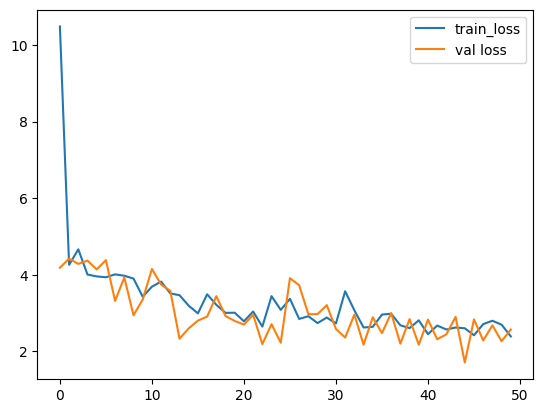

In [23]:
# Plot the Loss


plt.plot(history.history['loss'], label = 'train_loss')
plt.plot(history.history['val_loss'], label ='val loss')
plt.legend()
plt.show()
# plt.savefig('LossVal_loss')

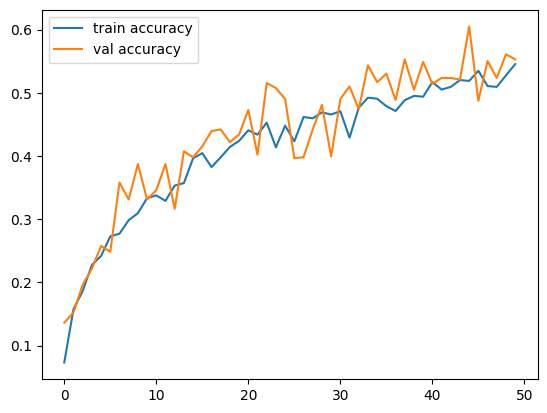

In [24]:
# Plot the Accuracy
plt.plot(history.history['accuracy'], label = 'train accuracy')
plt.plot(history.history['val_accuracy'], label ='val accuracy')
plt.legend()
plt.show()
# plt.savefig('valAccuracy')

# Save the Model

In [25]:
# Save it as a h5 file
from tensorflow.keras.models import load_model

model.save('gujarati_signs_resnet50.h5')

# Predict

## Prediction On test data

In [26]:
prediction = model.predict(test_set)

24/24 ━━━━━━━━━━━━━━━━━━━━ 20s 693ms/step


In [27]:
prediction
len(prediction)

749

In [28]:
prediction = np.argmax(prediction, axis = 1)
prediction
# print(len(prediction))

array([14,  0, 28,  0, 22, 23, 33, 16, 16, 16, 24, 30, 19,  5, 29, 33, 16,
       16, 14, 15, 28,  8,  8, 28, 16,  7, 28,  5, 15, 28, 14,  1, 17, 28,
       29, 32, 27,  5, 28, 24, 28, 23, 28, 21,  5, 21, 20, 24, 27, 26, 28,
       16,  2,  0, 27, 27, 18, 24, 28,  2, 15,  8, 28, 10, 23, 15, 21,  7,
       28, 19,  0, 32, 28,  5, 23, 28, 19,  5,  2,  2, 13, 23, 33, 19, 27,
        5,  5,  2,  5, 27,  0, 28, 16, 30, 13, 19, 28, 25, 28, 27,  2, 28,
       19, 10,  5, 10,  0,  5, 27, 16, 15, 33, 27,  5, 17, 27,  9, 23, 26,
       19, 13,  5,  0, 16, 33, 20, 28,  0, 14,  7,  1,  5,  0, 27,  7, 20,
       17, 28,  5,  5, 21,  5, 28, 18, 28, 30,  2, 28, 27, 28, 18,  0, 17,
       18, 28,  5, 19,  1, 28, 14,  0, 27,  7, 27, 28, 16,  4, 10, 16,  5,
        8, 19,  6, 17, 28, 30, 14, 10,  0,  5, 15, 28,  0, 28, 10, 19,  5,
       28, 13, 28,  2, 28, 23, 28, 23, 33, 27, 16,  2, 20, 27,  5, 16, 28,
       14, 15, 23,  2,  8, 27, 16, 19, 27, 28, 33,  2, 33,  0,  9, 27,  0,
       28, 18, 28,  6,  5

In [33]:
# True labels
true_labels = training_set.classes
print(true_labels)

[ 0  0  0 ... 33 33 33]
